In [ ]:
!unzip /content/credit_risk.csv.zip

Archive:  /content/credit_risk.csv.zip
  inflating: credit_risk.csv         


In [32]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Loading dataset
df = pd.read_csv('/content/credit_risk.csv')

In [ ]:
#Viewing top rows of dataset
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
# Viewing last rows from dataset
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
# Checkinh NULL values in data rows
df.isna().sum()

,0
Id,0
Age,0
Income,0
Home,0
Emp_length,895
Intent,0
Amount,0
Rate,3116
Status,0
Percent_income,0


In [ ]:
# Drop rows with NULL values
df.dropna(inplace=True)

<Axes: >

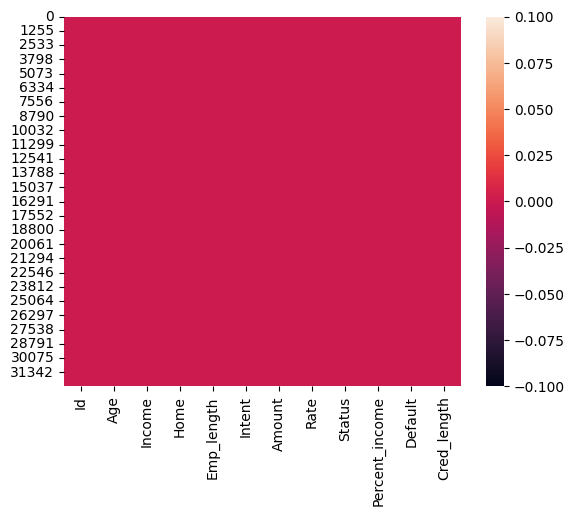

In [ ]:
# Checking the data is cleaned
sns.heatmap(df.isna())

## Data Visualisation

In [ ]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


<Axes: xlabel='Cred_length', ylabel='count'>

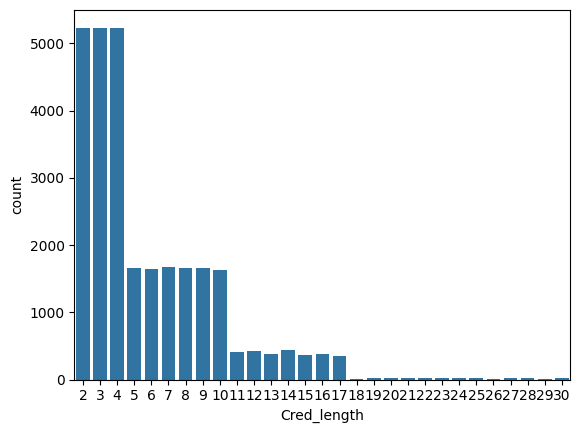

In [ ]:
# Graph to show how many holder have different no of credit length
sns.countplot(x='Cred_length', data=df)

<Axes: xlabel='Default', ylabel='count'>

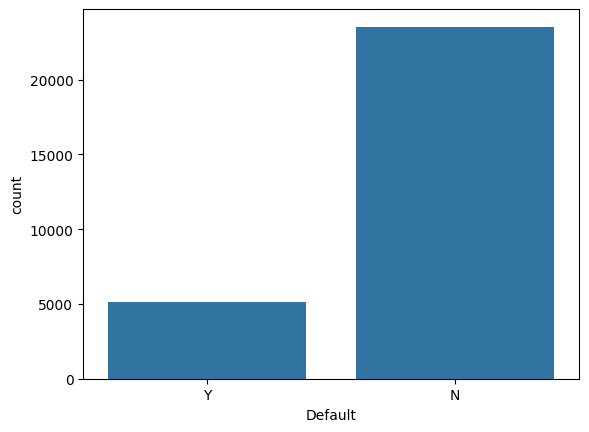

In [ ]:
# Grap to show no of holder has default
sns.countplot(x='Default', data=df)

<Axes: xlabel='Intent', ylabel='count'>

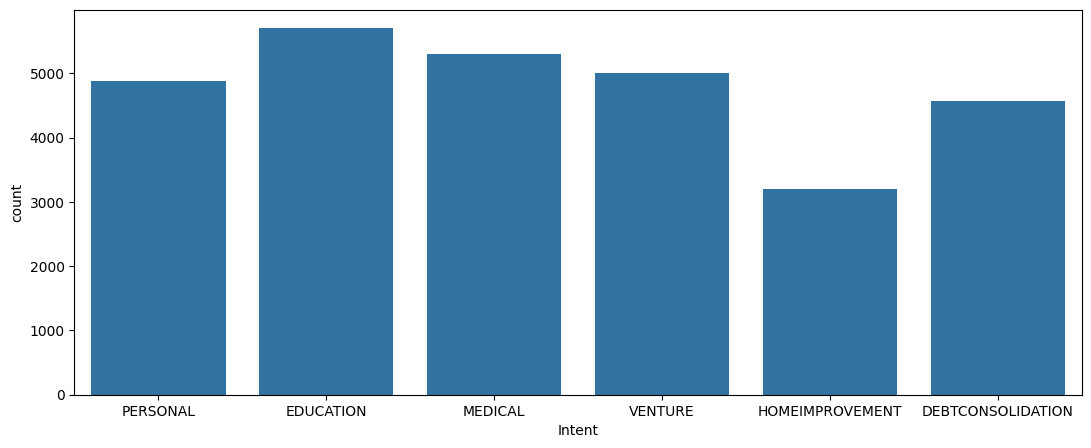

In [ ]:
# Graph to show Intent
plt.figure(figsize=(13,5))
sns.countplot(x='Intent', data=df)

<Axes: xlabel='Home', ylabel='count'>

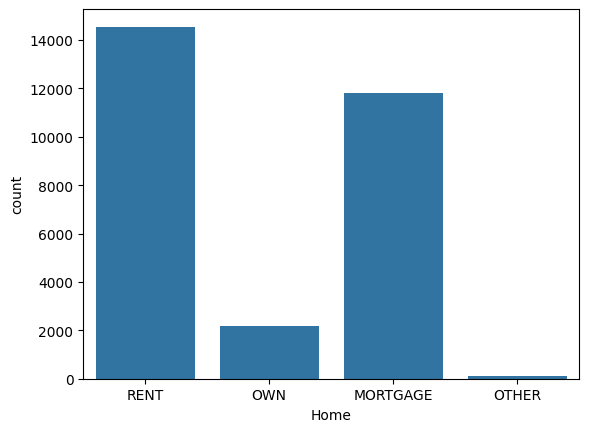

In [ ]:
# Graph to show Home type
sns.countplot(x='Home', data=df)

## Feature Engineering

In [ ]:
# Converting Rate column for CLassification Model
def classify_interest_rate(interest_rate):
  if interest_rate < 8:
    return 'Low (Below 8 %)'
  elif 8 <= interest_rate < 17:
    return 'Medium(8% - 17%)'
  else:
    return 'Very High(above 17%)'

# You can create a new column named 'Interest_Rate_Class'
df['Interest_Rate_Class'] = df['Rate'].apply(classify_interest_rate)


df.drop(['Rate'], axis=1, inplace=True)

In [ ]:
df['Interest_Rate_Class']

,Interest_Rate_Class
0,Medium(8% - 17%)
1,Medium(8% - 17%)
2,Medium(8% - 17%)
3,Medium(8% - 17%)
4,Medium(8% - 17%)
...,...
32576,Medium(8% - 17%)
32577,Low (Below 8 %)
32578,Medium(8% - 17%)
32579,Medium(8% - 17%)


In [ ]:
# Drop Columns not necessary
df.drop(columns=['Id', 'Emp_length', 'Age'], inplace=True, axis=1)

In [ ]:
# Viewing dataset after pre processing
df.head()

,Income,Home,Intent,Amount,Status,Percent_income,Default,Cred_length,Interest_Rate_Class
0,59000,RENT,PERSONAL,35000,1,0.59,Y,3,Medium(8% - 17%)
1,9600,OWN,EDUCATION,1000,0,0.10,N,2,Medium(8% - 17%)
2,9600,MORTGAGE,MEDICAL,5500,1,0.57,N,3,Medium(8% - 17%)
3,65500,RENT,MEDICAL,35000,1,0.53,N,2,Medium(8% - 17%)
4,54400,RENT,MEDICAL,35000,1,0.55,Y,4,Medium(8% - 17%)


In [ ]:
# Splitting Target and feature columns
X = df.drop('Interest_Rate_Class', axis=1)
y = df['Interest_Rate_Class']

In [ ]:
# Handling object type columns
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Shape of training and testing dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48926, 14), (12232, 14), (48926,), (12232,))

## Model Building

* Model - 1 Logistic Regression

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Fit the model with training dataset
logreg.fit(X_train, y_train)

# Test the model with testing data
y_pred_logreg = logreg.predict(X_test)

# Model Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.606278613472858
                      precision    recall  f1-score   support

     Low (Below 8 %)       0.57      0.85      0.68      4117
    Medium(8% - 17%)       0.51      0.23      0.32      4086
Very High(above 17%)       0.70      0.73      0.72      4029

            accuracy                           0.61     12232
           macro avg       0.59      0.61      0.57     12232
        weighted avg       0.59      0.61      0.57     12232



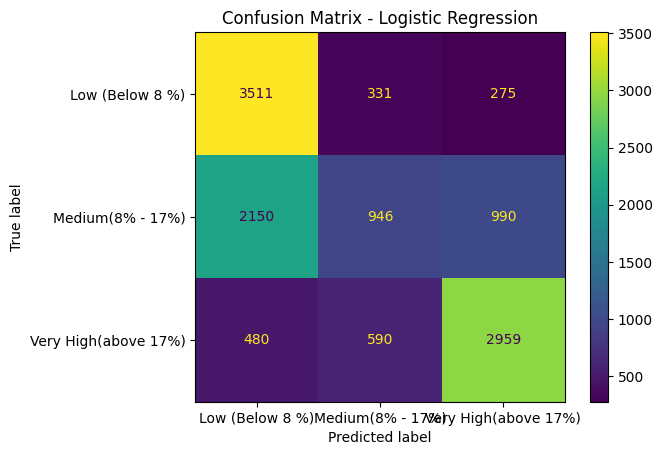

In [31]:
# Generate confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

* Model 2 - Decision Tree

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model with training dataset
dtree.fit(X_train, y_train)

# Test the model with testing data
y_pred_dtree = dtree.predict(X_test)

# Model Evaluation
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Accuracy:", accuracy_dtree)
print(classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.7556409417920209
                      precision    recall  f1-score   support

     Low (Below 8 %)       0.70      0.70      0.70      4117
    Medium(8% - 17%)       0.68      0.66      0.67      4086
Very High(above 17%)       0.89      0.90      0.90      4029

            accuracy                           0.76     12232
           macro avg       0.76      0.76      0.76     12232
        weighted avg       0.75      0.76      0.76     12232



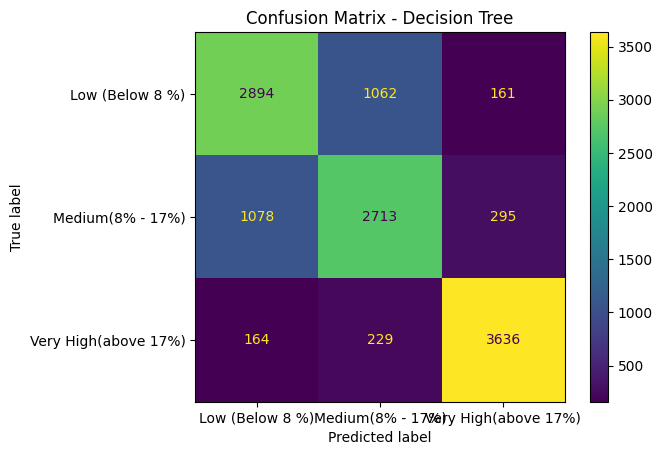

In [33]:
# Generate confusion matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot confusion matrix
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cm_dtree, display_labels=dtree.classes_)
disp_dtree.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

* Model 3 - Random FOrest Classifier

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit model with training dataset
rf.fit(X_train, y_train)

# Test model on testing dataset
y_pred_rf = rf.predict(X_test)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8151569653368215
                      precision    recall  f1-score   support

     Low (Below 8 %)       0.76      0.79      0.77      4117
    Medium(8% - 17%)       0.77      0.70      0.73      4086
Very High(above 17%)       0.92      0.95      0.93      4029

            accuracy                           0.82     12232
           macro avg       0.81      0.82      0.81     12232
        weighted avg       0.81      0.82      0.81     12232



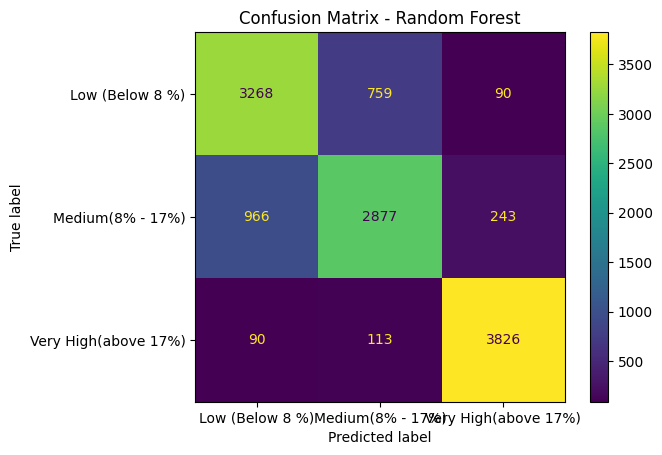

In [34]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

* Model 4 - Gradient Boosting Classifier

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Fit the model with training dataset
gb.fit(X_train, y_train)

# Test the model with testing data
y_pred_gb = gb.predict(X_test)

# Model Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7124754741661217
                      precision    recall  f1-score   support

     Low (Below 8 %)       0.63      0.77      0.69      4117
    Medium(8% - 17%)       0.68      0.57      0.62      4086
Very High(above 17%)       0.85      0.80      0.83      4029

            accuracy                           0.71     12232
           macro avg       0.72      0.71      0.71     12232
        weighted avg       0.72      0.71      0.71     12232



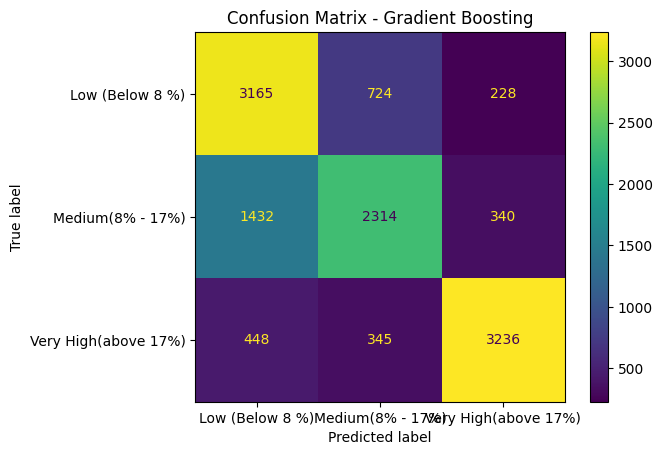

In [35]:
# Generate confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb.classes_)
disp_gb.plot()
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

### Model Evaluation

Text(0.5, 1.0, 'Model Accuracy Comparison')

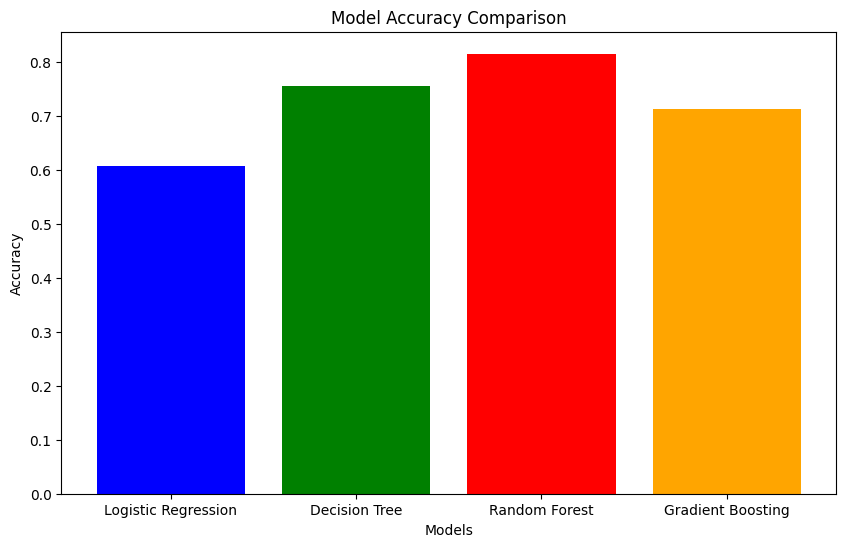

In [ ]:
# Plot accuracy of all model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy_logreg, accuracy_dtree, accuracy_rf, accuracy_gb]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

* Making prediction on random dataset rows and compare it with actual values

In [ ]:
# Select 5 random rows from the test dataset
X_test_df = pd.DataFrame(X_test)  # Convert X_test to DataFrame
random_indices = np.random.choice(len(y_test), 5, replace=False)

# Select rows using iloc and the random indices
random_rows = X_test_df.iloc[random_indices]

# Make predictions using the Random Forest model
predictions = rf.predict(random_rows)

# Get the actual values
actual_values = y_test.iloc[random_indices]

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Actual Value': actual_values, 'Predicted Value': predictions})

results_df

,Actual Value,Predicted Value
16013,Medium(8% - 17%),Medium(8% - 17%)
3541,Medium(8% - 17%),Low (Below 8 %)
37277,Low (Below 8 %),Low (Below 8 %)
58896,Very High(above 17%),Very High(above 17%)
38496,Low (Below 8 %),Low (Below 8 %)
